# Klasifikasi Tomat

step by step membuat klasifikasi tomat apakah termasuk kedalam grade Eksper, Lokal Premium atau Industri.

Grade :
1. Ekspor = grade tertinggi, untuk ekspor
2. Lokal Premium = grade menengah, untuk didistribusikan ke sawalay/toko
3. Industri = grade terbawah, untuk dikirim ke pabrik saus tomat

In [1]:
# mengimport pandas dan memanggil dataset
import pandas as pd

df = pd.read_csv("dataset_tomat.csv")
df

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
0,95,8.5,4.8,0.85,Ekspor
1,88,9.2,5.1,0.90,Ekspor
2,102,8.8,4.9,0.82,Ekspor
3,110,8.1,4.6,0.88,Ekspor
4,92,9.0,5.0,0.87,Ekspor
...,...,...,...,...,...
85,180,4.2,3.0,0.57,Industri
86,208,3.4,2.8,0.53,Industri
87,172,4.7,3.2,0.59,Industri
88,188,4.0,2.9,0.56,Industri


In [7]:
# menampilkan jumlah baris dan kolom
df.shape

(90, 5)

In [3]:
df.columns

Index(['berat', 'kekenyalan', 'kadar_gula', 'tebal_kulit', 'grade'], dtype='object')

In [6]:
# menampilkan kolom beserta tipe datanya
df.dtypes

berat            int64
kekenyalan     float64
kadar_gula     float64
tebal_kulit    float64
grade           object
dtype: object

In [8]:
df.head(4)

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
0,95,8.5,4.8,0.85,Ekspor
1,88,9.2,5.1,0.90,Ekspor
2,102,8.8,4.9,0.82,Ekspor
3,110,8.1,4.6,0.88,Ekspor


In [9]:
df.tail(3)

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
87,172,4.7,3.2,0.59,Industri
88,188,4.0,2.9,0.56,Industri
89,198,3.6,2.6,0.54,Industri


In [11]:
# menamplkan isian kolom grade beserta jumlah masing-masing
df["grade"].value_counts()

grade
Ekspor           30
Lokal Premium    30
Industri         30
Name: count, dtype: int64

In [12]:
# menampilkan struktur dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   berat        90 non-null     int64  
 1   kekenyalan   90 non-null     float64
 2   kadar_gula   90 non-null     float64
 3   tebal_kulit  90 non-null     float64
 4   grade        90 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 3.6+ KB


In [13]:
# menampilkan statistik dataframe
df.describe()

,berat,kekenyalan,kadar_gula,tebal_kulit
count,90.000000,90.000000,90.000000,90.000000
mean,142.388889,6.547778,3.956667,0.721778
std,37.919398,1.933456,0.785265,0.126461
min,85.000000,3.400000,2.600000,0.510000
25%,104.250000,4.525000,3.225000,0.592500
50%,143.000000,6.850000,4.000000,0.730000
75%,175.500000,8.375000,4.700000,0.847500
max,210.000000,9.400000,5.200000,0.920000


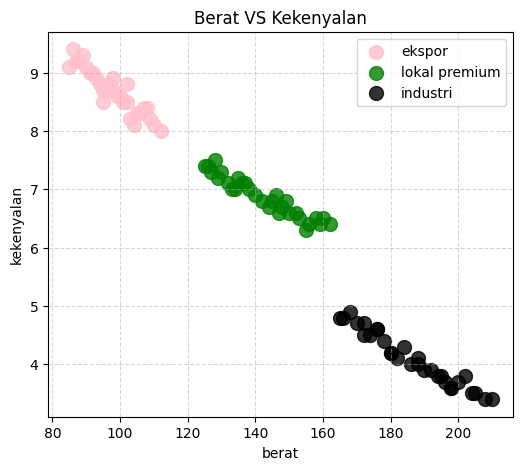

In [24]:
# visualisasi data dengan matplotlib
# import matplotlib
import matplotlib.pyplot as plt


ekspor = df[df["grade"]=="Ekspor"]
lokal_premium=df[df["grade"]=="Lokal Premium"]
industri = df[df["grade"]=="Industri"]

plt.figure(figsize=(6,5))

plt.scatter(ekspor["berat"], ekspor["kekenyalan"], s=100, alpha=0.8, color="pink", label="ekspor")
plt.scatter(lokal_premium["berat"], lokal_premium["kekenyalan"],s=100,alpha=0.8,color="green",label="lokal premium")
plt.scatter(industri["berat"],industri["kekenyalan"],s=100,alpha=0.8,color="black",label="industri")

plt.xlabel("berat")
plt.ylabel("kekenyalan")
plt.title("Berat VS Kekenyalan")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.5)
plt.show()

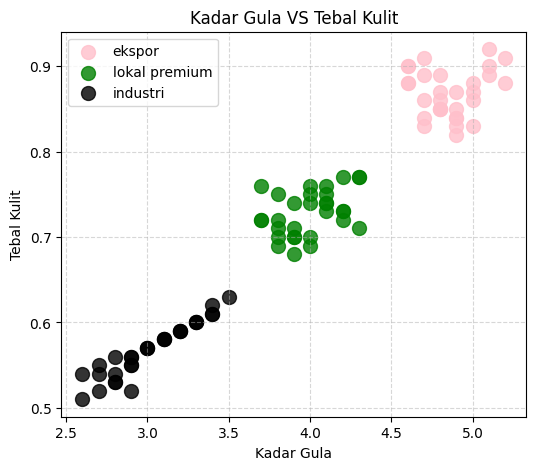

In [25]:
# visualisasi data dengan matplotlib
# import matplotlib
import matplotlib.pyplot as plt


ekspor = df[df["grade"]=="Ekspor"]
lokal_premium=df[df["grade"]=="Lokal Premium"]
industri = df[df["grade"]=="Industri"]

plt.figure(figsize=(6,5))

plt.scatter(ekspor["kadar_gula"], ekspor["tebal_kulit"], s=100, alpha=0.8, color="pink", label="ekspor")
plt.scatter(lokal_premium["kadar_gula"], lokal_premium["tebal_kulit"],s=100,alpha=0.8,color="green",label="lokal premium")
plt.scatter(industri["kadar_gula"],industri["tebal_kulit"],s=100,alpha=0.8,color="black",label="industri")

plt.xlabel("Kadar Gula")
plt.ylabel("Tebal Kulit")
plt.title("Kadar Gula VS Tebal Kulit")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.5)
plt.show()

In [35]:
# import library yang dibutuhkan
# 'siapkan alat'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# siapkan features dan target/label
# 'siapkan bahan'

# kolom untuk features
X = df[["berat","kekenyalan","kadar_gula","tebal_kulit"]]

y = df["grade"]

# pisahkan X dan y menjadi data latih dan data tes
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=41
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# buat algoritma machine learningnya/buat otak baru
model = LogisticRegression()

# suruh otak belajar
model.fit(X_train_scaled,y_train)

# suruh otak ulangan,simpan jawabannya di y_pred
y_pred = model.predict(X_test_scaled)

# bandingkan kunci jawaban dengan jawaban ulangannya
print("akurasi :",accuracy_score(y_test,y_pred))

akurasi : 1.0


In [37]:
# mwngurutkan ururtan class pada model
model.classes_

array(['Ekspor', 'Industri', 'Lokal Premium'], dtype=object)

In [49]:
data_baru=pd.DataFrame([[150,3.7,4.0,0.8]],columns=["berat","kekenyalan","kadar_gula","tebal_kulit"])
data_baru_scaled=scaler.transform(data_baru)

print(model.predict(data_baru_scaled)[0])
print(model.classes_)
print(model.predict_proba(data_baru_scaled)[0])

# kode yang akan sering digunakan
prediksi=model.predict(data_baru_scaled)[0]
presentase=max(model.predict_proba(data_baru_scaled)[0])
print(f"model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Lokal Premium
['Ekspor' 'Industri' 'Lokal Premium']
[0.01591137 0.44745351 0.53663512]
model memprediksi Lokal Premium dengan tingkat keyakinan 53.66%


In [51]:
import joblib

joblib.dump(model,"model_klasifikasi_tomat.joblib")
joblib.dump(scaler,"scaler_klasifikasi_tomat.joblib")

['scaler_klasifikasi_tomat.joblib']